$\textbf{Load the file: EEG-2.mat}$

In [134]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram


In [135]:
data = loadmat('EEG-2.mat')   
EEG2  = data['EEG'].reshape(-1) # Extract the EEG variable
t = data['t'][0]            # ... and the t variablea

$\textbf{1 i. What is the sampling interval?}$

In [136]:
dt = t[1] - t[0]
print('The sampling interval is', dt)

The sampling interval is 0.001


$\textbf{1 ii. What is the total duration of the recording (T)}$

In [137]:
#sampling frequency
f0 = 1/dt

#number of points in the data (N)
N = np.size(EEG2)

# What is the total time of the observation (T)?
T = N * dt
print('The total duration of the recording is', T, 'second')

The total duration of the recording is 1.0 second


$\textbf{1 iii. What is the frequency resolution (df)?}$

$\textbf{1 iv. What is the nyquist frequency (fNQ)?}$

In [138]:
fNQ = f0/2
df = 1/T

print('The Nyquist frequency is', fNQ)
print('The frequency resolution is', df)

The Nyquist frequency is 500.0
The frequency resolution is 1.0


$\textbf{v. Plot the data and visually inspect it. Describe briefly (in a sentence or two) what rhythms - if any - you see in the data. }$

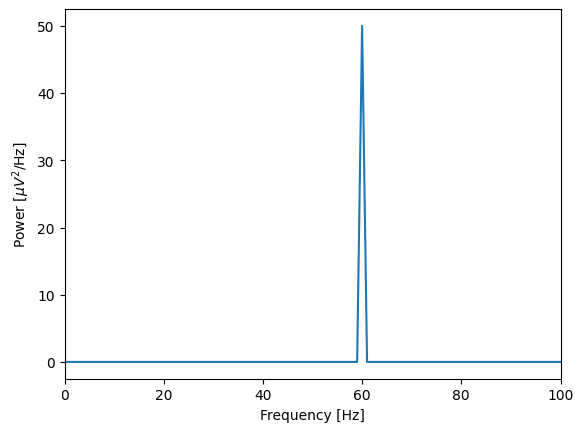

In [139]:
#frequency axis
fj  = np.arange(0,fNQ,df)

x = EEG2
X = np.ndarray(np.size(fj), complex);
for j in range( np.size(fj) ):
    X[j] = np.sum(x * np.exp(-2 * np.pi * 1j * fj[j] * t)) #1j is the square root of -1; replaces i in our Xj formula 

# And the spectrum,
Sxx = 2*dt**2/T * X * np.conj(X) #Sxx at frequency index j 

# Plot
plt.plot(fj, Sxx.real)
plt.xlim([0, 100])                          # Select frequency range
plt.xlabel('Frequency [Hz]')                
plt.ylabel('Power [$\mu V^2$/Hz]');
plt.show()

$\textbf{1 vi. Plot the spectrum versus frequency.}$ You may choose to plot the spectrum on a decibel scale, or not. Defend your choice!

In [140]:
#power spectrum using the FFT function
x = EEG2
xf = np.fft.fft(x)
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())
Sxx = Sxx[0:int(N / 2)].real

In [141]:
#define frequency axis
fNQ = f0/2
df = 1/T
faxis = np.arange(0,fNQ,df)

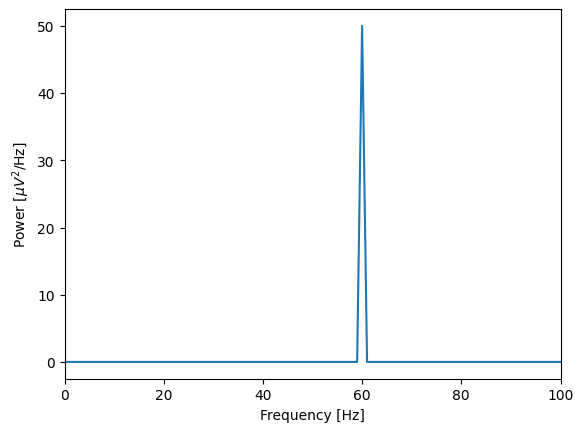

In [142]:
plt.plot(faxis, Sxx)
plt.xlim([0, 100])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [$\mu V^2$/Hz]');

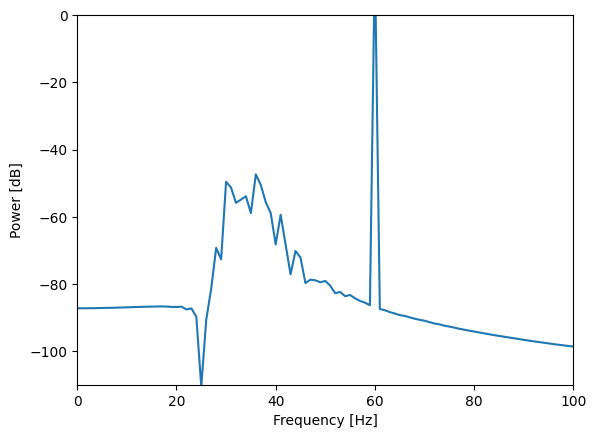

In [143]:
#decibel
plt.figure()
plt.plot(faxis, 10*np.log10(Sxx))   # Plot the spectrum in decibels.
plt.xlim([0, 100])                               # Select the frequency range.
plt.ylim([-110, 0])                               # Select the decibel range.
plt.xlabel('Frequency [Hz]')                     # Label the axes.
plt.ylabel('Power [dB]');

C:\Users\Gabrielle\AppData\Local\Temp\ipykernel_10600\453028821.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(faxis), 10*np.log10(Sxx))   # Plot the spectrum in decibels.


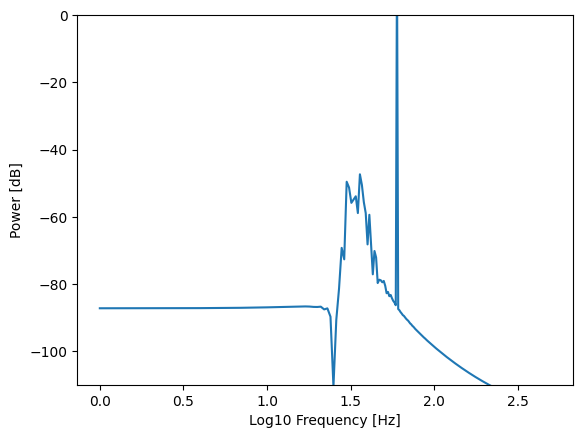

In [144]:
#log
plt.figure()
plt.plot(np.log10(faxis), 10*np.log10(Sxx))   # Plot the spectrum in decibels.
#plt.xlim([df, 100])                               # Select the frequency range.
plt.ylim([-110, 0])                               # Select the decibel range.
plt.xlabel('Log10 Frequency [Hz]')                     # Label the axes.
plt.ylabel('Power [dB]');

I chose to plot the spectrum verses the frequency not using a decibel scale 

 on a logarithim frequency axis

 scale because using the decibel scale allows for the normalization of the power spectrum (making comparisons across spectra easier). The logarithim representation of power also highlights small changes in the data, making it easier to see relative power differences across frequency bands. 

$\textbf{1 vii. Plot the spectrogram as a function of frequency and time.}$ You will need to choose the interval size and the overlap between intervals. Do the rhythms in these data appear to change in time?

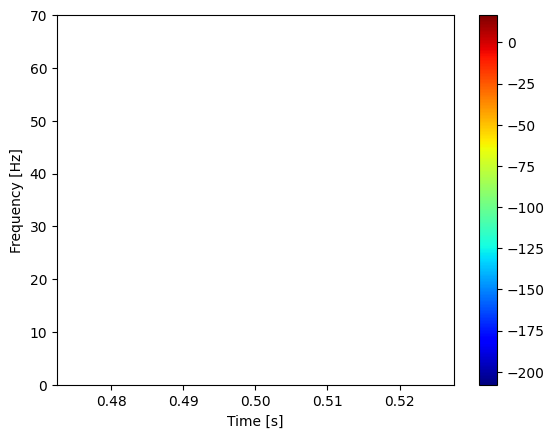

In [155]:
# Plot the spectrogram.

Fs = 1 / dt               # Define the sampling frequency,
interval = int(Fs)        # ... the interval size,
overlap = int(Fs * 0.95)  # ... and the overlap intervals

                          # Compute the spectrogram
f0, t0, Sxx0 = spectrogram(
    EEG2,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
plt.pcolormesh(t0, f0, 10 * np.log10(Sxx0),
               cmap='jet')# Plot the result
plt.colorbar()            # ... with a color bar,
plt.ylim([0, 70])             # ... set the frequency range,
plt.xlabel('Time [s]')       # ... and label the axes
plt.ylabel('Frequency [Hz]');

describe this when you get it to work lmfao

$\textbf{2 i. What is the sampling interval?}$

In [146]:
data3 = loadmat('EEG-3.mat') 

In [157]:
EEG3  = data['EEG'].reshape(-1) # Extract the EEG variable
t    = data['t'][0]  

In [158]:
dt = t[1] - t[0]
print('The sampling interval is', dt3)

The sampling interval is 0.001


$\textbf{1 ii. What is the total duration of the recording (T)}$

In [161]:
#sampling frequency
f0 = 1/dt

#number of points in the data (N)
N = np.size(EEG3)

# What is the total time of the observation (T)?
T = N * dt
print('The total duration of the recording is', T, 'second')

The total duration of the recording is 1.0 second


$\textbf{1 iii. What is the frequency resolution (df)?}$

$\textbf{1 iv. What is the nyquist frequency (fNQ)?}$

In [160]:
fNQ3 = f0/2
df3 = 1/T

print('The Nyquist frequency is', fNQ3)
print('The frequency resolution is', df3)

The Nyquist frequency is 500.0
The frequency resolution is 1.0


$\textbf{v. Plot the data and visually inspect it. }$ Describe briefly (in a sentence or two) what rhythms - if any - you see in the data. 

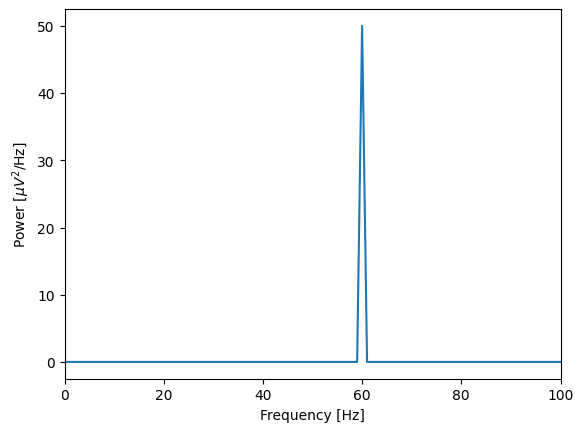

In [162]:
#frequency axis
fj  = np.arange(0,fNQ,df)

x = EEG3
X = np.ndarray(np.size(fj), complex);
for j in range( np.size(fj) ):
    X[j] = np.sum(x * np.exp(-2 * np.pi * 1j * fj[j] * t)) #1j is the square root of -1; replaces i in our Xj formula 

# And the spectrum,
Sxx = 2*dt**2/T * X * np.conj(X) #Sxx at frequency index j 

# Plot
plt.plot(fj, Sxx.real)
plt.xlim([0, 100])                          # Select frequency range
plt.xlabel('Frequency [Hz]')                
plt.ylabel('Power [$\mu V^2$/Hz]');
plt.show()

$\textbf{1 vi. Plot the spectrum versus frequency.}$ You may choose to plot the spectrum on a decibel scale, or not. Defend your choice!

In [167]:
#power spectrum using the FFT function
x3 = EEG3
xf3 = np.fft.fft(x)
Sxx3 = 2 * dt ** 2 / T * (xf * xf.conj())
Sxx3 = Sxx[0:int(N / 2)].real

In [168]:
#define frequency axis
fNQ3 = f0/2
df3 = 1/T
faxis3 = np.arange(0,fNQ,df)

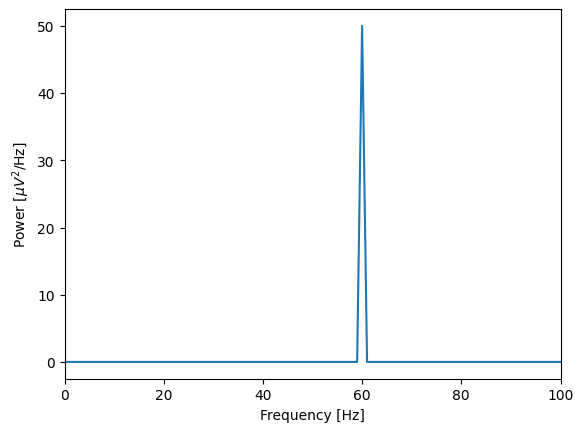

In [169]:
plt.plot(faxis3, Sxx3)
plt.xlim([0, 100])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [$\mu V^2$/Hz]');

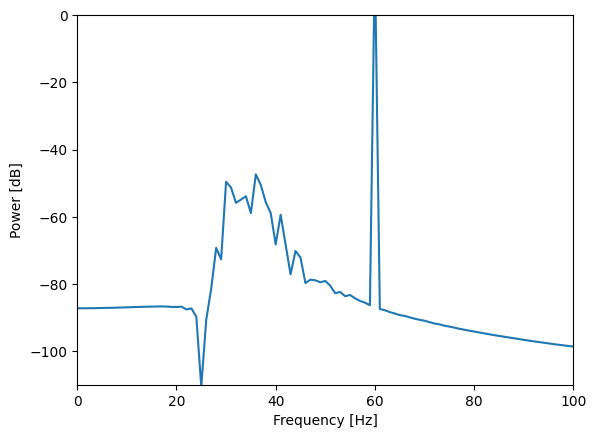

In [170]:
#decibel
plt.figure()
plt.plot(faxis3, 10*np.log10(Sxx3))   # Plot the spectrum in decibels.
plt.xlim([0, 100])                               # Select the frequency range.
plt.ylim([-110, 0])                               # Select the decibel range.
plt.xlabel('Frequency [Hz]')                     # Label the axes.
plt.ylabel('Power [dB]');

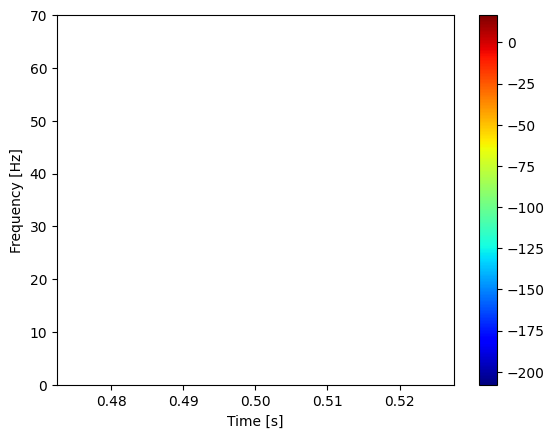

In [173]:
# Plot the spectrogram.
Fs = 1 / dt               # Define the sampling frequency,
interval = int(Fs)        # ... the interval size,
overlap = int(Fs * 0.95)  # ... and the overlap intervals

                          # Compute the spectrogram
f0, t0, Sxx0 = spectrogram(
    EEG3,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
plt.pcolormesh(t0, f0, 10 * np.log10(Sxx0),
               cmap='jet')# Plot the result
plt.colorbar()            # ... with a color bar,
plt.ylim([0, 70])             # ... set the frequency range,
plt.xlabel('Time [s]')       # ... and label the axes
plt.ylabel('Frequency [Hz]');

1. Load the file: EEG-2.mat, available on the Github repository into Python.
    i. What is the sampling interval?
    ii. What is the total duration of the recording (T)?
    
    iii. What is the frequency resolution (df)?

    iv. What is the Nyquist frequency (fNQ)?

    v. Plot the data and visually inspect it. Describe briefly (in a sentence or two) what rhythms - if any - you see in the data.

    vi. Plot the spectrum versus frequency. You may choose to plot the spectrum on a decibel scale, or not. Defend your choice!

    vii. Plot the spectrogram as a function of frequency and time. You will need to choose the interval size and the overlap between intervals. Do the rhythms in these data appear to change in time?

    viii. Interpret (in a few sentences) the spectrum and spectrogram, and describe the rhythms present in the signal. Compare your visual inspection of the data to the spectrum results - do the analyses agree or disagree?

2. Repeat Question (1) for the data set EEG-3.mat. Be sure to address each sub-question.

3. Repeat Question (1) for the data set EEG-4.mat. Be sure to address each sub-question.

4. Repeat Question (1) for the data set EEG-5.mat. Be sure to address each sub-question.

5. Consider the function $x(t) =  sin(2 pi t^2)$. That's a "t squared" input in the $sin$ function. 

    i. Simulate this function in Python using a sampling interval of dt = 0.001 s, and t = (0, 10) s.
    
    ii.Compute the spectrum, and compute the spectrogram.

    iii.Explain the results you find in each case, and how these results compare to your expectations.